In [58]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import sklearn
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import time

In [72]:
data = pd.read_csv('data bocor-new1.csv', sep=',', encoding='utf-8') 
data

,time,id,username,text
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno Gak usah sok keren data bocor ...
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai Bisa aja email kak ame bocor tr...
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'Data yang Bocor Berpotensi Disalahgunakan Pe...
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...
...,...,...,...,...
204,2021-11-14 04:06:06+00:00,1459734360815386626,drama alter,"b'SUBES !! HALLO SUBES !! \n""Kebenaran akan da..."
205,2021-11-14 03:16:26+00:00,1459721858727612419,꧁jajansai~redi sealed memo20+POB꧂,b'@bonvoyajeon Tp kl aku kasih ripiw pasti aku...
206,2021-11-14 00:05:02+00:00,1459673694964379651,Jawa Pos,b'Teror Penagihan hingga Ancaman Data Pribadi ...
207,2021-11-13 17:09:33+00:00,1459569133096341506,CanduKenikmatan,"b'@rindubulanq @New_boyz_Sby tambahan tips, ka..."


In [73]:
data = data.drop(data.columns[[0,1,2]], axis=1)
data.head()

,text
0,b'@txtdaritekno Gak usah sok keren data bocor ...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...


In [76]:
# Removing Punctuationtrain

import string
import re
string.punctuation

def remove_punctuation(txt):
    '''a function for removing punctuation'''
    text = txt[1:]
    text = re.sub('@[^\s]+','',text)
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub("#\S+", " ", text)
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('  ', '', text)
    return text

data['clean'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,text,clean
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Gak usah sok keren data bocor di darkweb kare...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Bisa aja email kak ame bocor trus ada nomorny...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Data yang Bocor Berpotensi Disalahgunakan Pela...
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,CISSReC Sebut Data Pribadi Bocor Bisa


In [77]:
# Casefolding

def casefolding(txt):
    text = str(txt).lower()
    return text

data['casefolding'] = data['clean'].apply(lambda x: casefolding(x))
data.head()

,text,clean,casefolding
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa


In [78]:
#tokenizing
def tokenize(kalimat):
    text = word_tokenize(kalimat)
    return text

data['tokenize'] = data['casefolding'].apply(lambda x: tokenize(x))
data.head()

,text,clean,casefolding,tokenize
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"[gak, usah, sok, keren, data, bocor, di, darkw..."
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"[bisa, aja, email, kak, ame, bocor, trus, ada,..."
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"[data, yang, bocor, berpotensi, disalahgunakan..."
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"[kok, data, lu, bocor, yaa, hmm, isok, ae, lak..."
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"[cissrec, sebut, data, pribadi, bocor, bisa]"


In [79]:
#filtering

def stopwords_removal(txt):
  filtering = stopwords.words('indonesian', 'english')
  x = []
  data = []
  def myFunc(x):
    if x in filtering:
      return False
    else:
      return True
  fit = filter(myFunc, txt)
  for x in fit:
    data.append(x)
  return data

data['stopwords'] = data['tokenize'].apply(lambda x: stopwords_removal(x))
data.head()

,text,clean,casefolding,tokenize,stopwords
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"[gak, usah, sok, keren, data, bocor, di, darkw...","[gak, sok, keren, data, bocor, darkweb, warga,..."
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"[bisa, aja, email, kak, ame, bocor, trus, ada,...","[aja, email, kak, ame, bocor, trus, nomornya, ..."
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"[data, yang, bocor, berpotensi, disalahgunakan...","[data, bocor, berpotensi, disalahgunakan, pela..."
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"[kok, data, lu, bocor, yaa, hmm, isok, ae, lak...","[data, lu, bocor, yaa, hmm, isok, ae, lak, mbu..."
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"[cissrec, sebut, data, pribadi, bocor, bisa]","[cissrec, data, pribadi, bocor]"


In [81]:
#stemming

from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(txt):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in txt:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

data['stemming'] = data['stopwords'].apply(lambda x: stemming(x))
data.head()

data.to_csv('data_clean.csv', index=False)
data_clean = pd.read_csv('data_clean.csv', encoding='latin1')
data_clean.head()

gak sok keren data bocor darkweb warga negara udah bocor data ktp amp kk bungkus kacang amp goreng
aja email kak ame bocor trus nomor nyambung email mending cari getcontact trus diblock kak kalo ngga kenal ngatasin data bocor
data bocor potensi disalahgunakan laku terorisme
data lu bocor yaa hmm isok ae lak mbujuki rek
cissrec data pribadi bocor
nasabah daya data bocor halus kirain bank beneran percaya ngeles jebak betmen
banget lho risiko data pribadi bocor sobat keva hatihati jaga data pribadi data tangan tanggung jawabnn
cissrec teroris pakai data wni bocor rekrut anggota
data bocor laku terorismenn
baik kali bokdata ktp bocor
data bocor
gilaa ngaku pinjol nelp mutual twitter gw gw gakpunya nomernya tau nama lengkap gue alamat rem banget pas cek nomernya getcontact yaa tau data gw bocor
buatpengguna smartphone gak takut data bocor ya emang udah bocor
gin ya pasang app dihp dimintain tuju hubung dengn apa dihp izin gak langsung izin data identitas bocor jdi jgn heran
algoritma jelasi

,text,clean,casefolding,tokenize,stopwords,stemming
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"['gak', 'usah', 'sok', 'keren', 'data', 'bocor...","['gak', 'sok', 'keren', 'data', 'bocor', 'dark...",gak sok keren data bocor darkweb warga negara ...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"['bisa', 'aja', 'email', 'kak', 'ame', 'bocor'...","['aja', 'email', 'kak', 'ame', 'bocor', 'trus'...",aja email kak ame bocor trus nomor nyambung em...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"['data', 'yang', 'bocor', 'berpotensi', 'disal...","['data', 'bocor', 'berpotensi', 'disalahgunaka...",data bocor potensi disalahgunakan laku terorisme
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"['kok', 'data', 'lu', 'bocor', 'yaa', 'hmm', '...","['data', 'lu', 'bocor', 'yaa', 'hmm', 'isok', ...",data lu bocor yaa hmm isok ae lak mbujuki rek
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"['cissrec', 'sebut', 'data', 'pribadi', 'bocor...","['cissrec', 'data', 'pribadi', 'bocor']",cissrec data pribadi bocor


In [84]:
#pelabelan dengan textblob

# Casefolding

def text_blop(txt):
    text = TextBlob(str(txt))
    
    try:
      text = text.translate(to="en")
      time.sleep(1)
    except Exception as e:
      print(e)

    if text.sentiment.polarity > 0.0:
      hasil = "Positif"
    
    elif text.sentiment.polarity == 0.0:
      hasil = "Netral"

    else:
      hasil = "Negatif"

    return hasil

data_clean['label'] = data_clean['stemming'].apply(lambda x: text_blop(x))
data_clean.head()

Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.


,text,clean,casefolding,tokenize,stopwords,stemming,label
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"['gak', 'usah', 'sok', 'keren', 'data', 'bocor...","['gak', 'sok', 'keren', 'data', 'bocor', 'dark...",gak sok keren data bocor darkweb warga negara ...,Negatif
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"['bisa', 'aja', 'email', 'kak', 'ame', 'bocor'...","['aja', 'email', 'kak', 'ame', 'bocor', 'trus'...",aja email kak ame bocor trus nomor nyambung em...,Positif
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"['data', 'yang', 'bocor', 'berpotensi', 'disal...","['data', 'bocor', 'berpotensi', 'disalahgunaka...",data bocor potensi disalahgunakan laku terorisme,Netral
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"['kok', 'data', 'lu', 'bocor', 'yaa', 'hmm', '...","['data', 'lu', 'bocor', 'yaa', 'hmm', 'isok', ...",data lu bocor yaa hmm isok ae lak mbujuki rek,Netral
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"['cissrec', 'sebut', 'data', 'pribadi', 'bocor...","['cissrec', 'data', 'pribadi', 'bocor']",cissrec data pribadi bocor,Netral


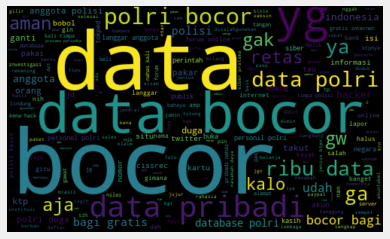

In [90]:
#plot the word cloud

allwords = ' '.join([str(twts) for twts in data_clean['stemming']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)


plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [91]:
#tweet Positif

j = 1
sortedDF = data_clean.sort_values(by=['label'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['label'][i] == 'Positif'):
    print(str(j) + ') '+str(sortedDF['stemming'][i]))
    print()
    j = j+1

1) aja email kak ame bocor trus nomor nyambung email mending cari getcontact trus diblock kak kalo ngga kenal ngatasin data bocor

2) nasabah daya data bocor halus kirain bank beneran percaya ngeles jebak betmen

3) banget lho risiko data pribadi bocor sobat keva hatihati jaga data pribadi data tangan tanggung jawabnn

4) baik kali bokdata ktp bocor

5) gin ya pasang app dihp dimintain tuju hubung dengn apa dihp izin gak langsung izin data identitas bocor jdi jgn heran

6) kr debit yg paypal aman simpen gaji data gak bocor ya guys lgkrn udh pny bc

7) kampus it baik bisa data mahasiswa studentsite bocor the best goendar

8) data polri bocor analisis amat

9) data bocor scroll aja twitter ratus yg complaint sample aja nongol jujurnnkalo maudata utuh sumber jenius btpn denial ga nanya amazon google bank of zimbabwennahli ga jamin bener kalo msh ngaco

10) rem banget data anak kampus bocor

11) jd ga lebih drpd bocor data informasinnpayahnya nih prof intel bina institusi intel

12) hendro

In [92]:
#tweet Negatif

j = 1
sortedDF = data_clean.sort_values(by=['label'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['label'][i] == 'Negatif'):
    print(str(j) + ') '+str(sortedDF['stemming'][i]))
    print()
    j = j+1

1) gak sok keren data bocor darkweb warga negara udah bocor data ktp amp kk bungkus kacang amp goreng

2) gilaa ngaku pinjol nelp mutual twitter gw gw gakpunya nomernya tau nama lengkap gue alamat rem banget pas cek nomernya getcontact yaa tau data gw bocor

3) buatpengguna smartphone gak takut data bocor ya emang udah bocor

4) algoritma jelasin dg sederhanannsesuatu sederhana data bocor halus bikin rumit pakai bahasa algoritmannvictim blaming denying the victim playing victim ituserangkai lingkar setan orang awam paham jujur

5) jendralnya jendral meja ya beginianak buah keburu mati dia mikirin strategi mati gilir jendralnya yg buru profnndata cia bocor densus yg ngamuk

6) data polri duga bocor pakar nilai investigasi serius

7) data bocor maksud gw gw ga mention data bocor data real salah btpn gw bain jenius ya guna monggo klo opini

8) lazada seller nakal oknum laintapiiiii data bocor transaksi lazada

9) sowhats the answernbisakahygdiperkuat firewallnya ganti pin melulu pin bocor

In [93]:
#tweet Netral

j = 1
sortedDF = data_clean.sort_values(by=['label'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['label'][i] == 'Netral'):
    print(str(j) + ') '+str(sortedDF['stemming'][i]))
    print()
    j = j+1

1) data bocor potensi disalahgunakan laku terorisme

2) data lu bocor yaa hmm isok ae lak mbujuki rek

3) cissrec data pribadi bocor

4) cissrec teroris pakai data wni bocor rekrut anggota

5) data bocor laku terorismenn

6) data bocor

7) data pribadi bocor lembaga bersangkutanharus tindak

8) iya ya jd waswas jg soalnyajd inget kmrn berita data bocor jg ya

9) mantan kaba atur sanksi institusi kumpul data bocor

10) knp debt collector sajannkalau data bocor salahgunakan

11) mantan kaba sanksi institusi kumpul data bocor

12) pipa pdam bocor jembatan makam romokalisari benowodipasangn

13) bocor publik data tahunsainteksoshum

14) data polri bocor analisis pengamatnklik baca

15) bocor ya data pribadi bank bripadahal pinjam dana online bukalapak tgl ga belanja online bukalapak klo tagih ga tanggung

16) bisabisanya data bocor

17) data pribadi langgar anggota bocor data polri retas

18) ko skrg serinh nemu loker yg isi form masukin nik nama no rekening ya official akun suudzon taping

In [103]:
#prosentase data

ptweets_positif = data[data_clean.label == 'Positif']
ptweets_positif = ptweets_positif['stemming']

print('Tweet positif ')
round((ptweets_positif.shape[0] / data.shape[0]) * 100, 1)

Tweet positif 


33.0

In [104]:
ptweets_negatif = data[data_clean.label == 'Negatif']
ptweets_negatif = ptweets_negatif['stemming']

print('Tweet negatif ')
round((ptweets_negatif.shape[0] / data.shape[0]) * 100, 1)

Tweet negatif 


20.6

In [105]:
ptweets_netral = data[data_clean.label == 'Netral']
ptweets_netral = ptweets_netral['stemming']

print('Tweet netral ')
round((ptweets_netral.shape[0] / data.shape[0]) * 100, 1)

Tweet netral 


46.4

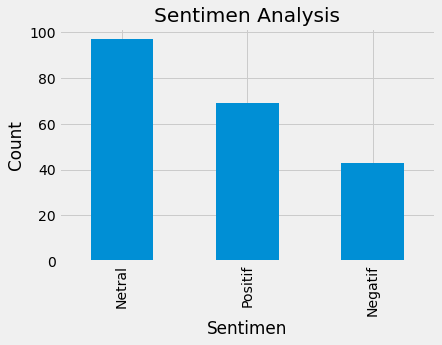

In [109]:
#grafik sentimen analis

data_clean['label'].value_counts()

plt.title('Sentimen Analysis')
plt.xlabel('Sentimen')
plt.ylabel('Count')
data_clean['label'].value_counts().plot(kind='bar')
plt.show()

In [111]:
data_clean = data_clean.astype({'label' : 'category'})
data_clean = data_clean.astype({'stemming' : 'string'})
data_clean.dtypes

text             object
clean            object
casefolding      object
tokenize         object
stopwords        object
stemming         string
label          category
dtype: object

In [113]:
#Pembobotan TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['stemming'].astype('U'))
print(text_tf)

  (0, 328)	0.27812585178483534
  (0, 424)	0.27812585178483534
  (0, 161)	0.27812585178483534
  (0, 460)	0.27812585178483534
  (0, 32)	0.46610457677634276
  (0, 486)	0.20413827825735842
  (0, 960)	0.18240393578524997
  (0, 596)	0.2165007702280527
  (0, 996)	0.2581804822424983
  (0, 202)	0.27812585178483534
  (0, 127)	0.1087483165452664
  (0, 203)	0.10979495054308881
  (0, 451)	0.27812585178483534
  (0, 860)	0.27812585178483534
  (0, 298)	0.17004144381455571
  (1, 607)	0.21814052763389535
  (1, 450)	0.21814052763389535
  (1, 612)	0.1913975930657248
  (1, 430)	0.14901104461593492
  (1, 230)	0.21814052763389535
  (1, 310)	0.20249691375227605
  (1, 171)	0.21814052763389535
  (1, 554)	0.20249691375227605
  (1, 640)	0.21814052763389535
  (1, 628)	0.16465465849755423
  :	:
  (207, 439)	0.3428490354966522
  (207, 290)	0.17949858765076637
  (207, 525)	0.17949858765076637
  (207, 1017)	0.10425753198647061
  (207, 665)	0.15441823576266778
  (207, 430)	0.2794943408064781
  (207, 486)	0.300312913863

In [114]:
# # split data into sets
# train 80% test 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['label'],test_size=0.2, random_state = 42)

In [116]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predicted))

print(f'confussion matrix:\n {confusion_matrix(y_test, predicted)}')
print("----------------------------------------")
print(classification_report(y_test, predicted, zero_division=0))

Accuracy :  0.6666666666666666
confussion matrix:
 [[ 1  4  0]
 [ 0 23  0]
 [ 0 10  4]]
----------------------------------------
              precision    recall  f1-score   support

     Negatif       1.00      0.20      0.33         5
      Netral       0.62      1.00      0.77        23
     Positif       1.00      0.29      0.44        14

    accuracy                           0.67        42
   macro avg       0.87      0.50      0.51        42
weighted avg       0.79      0.67      0.61        42



In [121]:
#SVM

from sklearn import svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)

predictions_SVM = SVM.predict(X_test)

print("SVM Accuracy Score -> ",accuracy_score(y_test, predictions_SVM)*100)
print(f'confussion matrix:\n {confusion_matrix(y_test, predictions_SVM)}')
print("----------------------------------------")
print(classification_report(y_test, predictions_SVM))

SVM Accuracy Score ->  61.904761904761905
confussion matrix:
 [[ 2  3  0]
 [ 0 18  5]
 [ 1  7  6]]
----------------------------------------
              precision    recall  f1-score   support

     Negatif       0.67      0.40      0.50         5
      Netral       0.64      0.78      0.71        23
     Positif       0.55      0.43      0.48        14

    accuracy                           0.62        42
   macro avg       0.62      0.54      0.56        42
weighted avg       0.61      0.62      0.61        42

